# Case Study - LoanTap

## Problem Statement
- To determine if a credit line should be extended to them.
- If yes, to find the repayment terms be in business recommendations.

## Context:

- A Non-Banking Finance Company like LoanTap is an online platform committed to delivering customized loan products to millennials. 
- They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.


- The data science team is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

- Company deploys formal credit to salaried individuals and businesses 4 main financial instruments:

    - Personal Loan
    - EMI Free Loan
    - Personal Overdraft
    - Advance Salary Loan

- This case study will focus on the underwriting process behind Personal Loan only

In [343]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [344]:
# Importing Data
df=pd.read_csv('logistic_regression.csv')

## Exploratory Data Analysis

In [345]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


### Missing Value Check :

In [346]:
df.isnull().sum()/df.count()*100

loan_amnt                0.000000
term                     0.000000
int_rate                 0.000000
installment              0.000000
grade                    0.000000
sub_grade                0.000000
emp_title                6.144952
emp_length               4.845008
home_ownership           0.000000
annual_inc               0.000000
verification_status      0.000000
issue_d                  0.000000
loan_status              0.000000
purpose                  0.000000
title                    0.445376
dti                      0.000000
earliest_cr_line         0.000000
open_acc                 0.000000
pub_rec                  0.000000
revol_bal                0.000000
revol_util               0.069740
total_acc                0.000000
initial_list_status      0.000000
application_type         0.000000
mort_acc                10.550337
pub_rec_bankruptcies     0.135274
address                  0.000000
dtype: float64

#### Isights:
- emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies have missing values need to be handled

In [347]:
df.shape

(396030, 27)

In [348]:
df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


#### Insight
- Loan Amount, Installments, Annual Income , revol_bal : all these columns have large differnece in mean and median.
- That means outliers are present in the data.

In [349]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [351]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [352]:
df['term'].value_counts()

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64

In [353]:
df['term']=df['term'].str.split(' ').str[1].astype(int)

In [354]:
df['emp_length']=df['emp_length'].str.split(' year').str[0]

In [355]:
df.loc[df['emp_length']=='10+','emp_length']=10

In [356]:
df.loc[df['emp_length']=='< 1','emp_length']=0

In [357]:
df['emp_length'].value_counts()

emp_length
10    126041
2      35827
0      31725
3      31665
5      26495
1      25882
4      23952
6      20841
7      20819
8      19168
9      15314
Name: count, dtype: int64

In [358]:
df['emp_length'].str.split(' ')

0         NaN
1         [4]
2         NaN
3         [6]
4         [9]
         ... 
396025    [2]
396026    [5]
396027    NaN
396028    NaN
396029    NaN
Name: emp_length, Length: 396030, dtype: object

In [359]:
# Extraction of year from the 'Earliest Credit Line' column
df['ecl_year'] = df['earliest_cr_line'].str.split('-').str[-1]

# Conversion of datatype from 'String' to 'Integer' for the 'Earliest Credit Line Year' column
df['ecl_year'] = pd.to_numeric(df['ecl_year'])

# Extraction of pincode from the 'Address' column
df['pin_code'] = df['address'].str.split(' ').str[-1]

# Extraction of pincode from the 'Address' column
df['issue_d_y'] = df['issue_d'].str.split('-').str[-1]

# Conversion of datatype from 'String' to 'Integer' for the 'Issue Date Year' column
df['issue_d_y'] = pd.to_numeric(df['issue_d_y'])

In [360]:
# Dropping the columns from which the requried data is extracted above
columns_to_drop = ['earliest_cr_line', 'address', 'issue_d']
df = df.drop(columns=columns_to_drop)

In [361]:
# Conversion of 'Categorical' data from 'object' to 'Category' datatype
for column in ('term', 'ecl_year', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'initial_list_status', 'application_type', 'pin_code'):
  df[column] = df[column].astype('category')

### Univariate Analysis

In [362]:
# Observing the unique values for each 'Categorical' column
for column in ('term', 'ecl_year', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'initial_list_status', 'application_type', 'pin_code'):
  print(f"{column}:{'_'*(30-len(column))}{df[column].nunique()}")

term:__________________________2
ecl_year:______________________65
grade:_________________________7
sub_grade:_____________________35
emp_title:_____________________173105
emp_length:____________________11
home_ownership:________________6
verification_status:___________3
loan_status:___________________2
purpose:_______________________14
title:_________________________48816
initial_list_status:___________2
application_type:______________3
pin_code:______________________10


- Based on the observation of unique values above, it is apparent that the 'employee title' and 'title' columns do not follow a pattern.
- The sheer volume of unique values, ranging in the hundreds of thousands suggests a lack of structured categorization.
- As a result, these columns will be excluded from subsequent analysis due to their limited potential for meaningful insights.

In [363]:
# Dropping the columns 'emp_title' and 'title'
columns_to_drop = ['emp_title', 'title']
df = df.drop(columns=columns_to_drop)

#### Count Plot for Categorical Columns

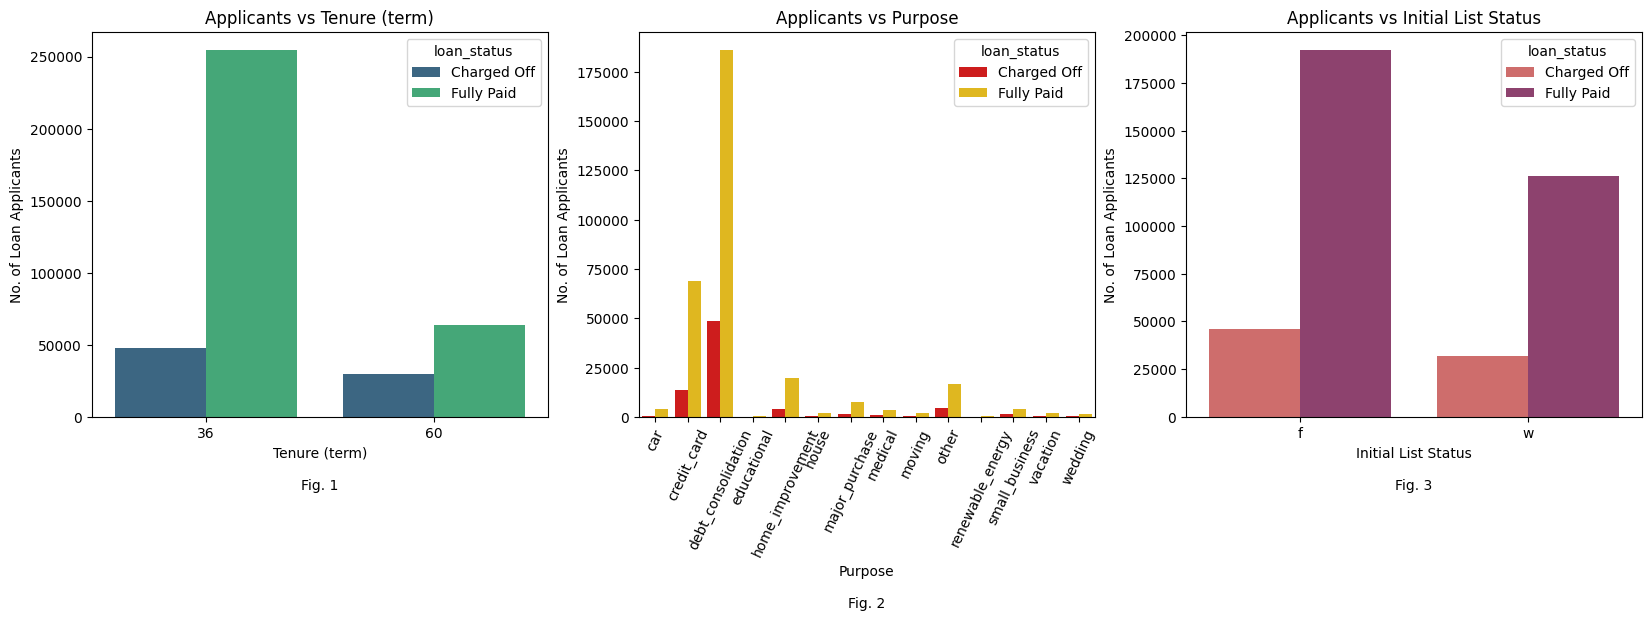

In [364]:
# Check the distribution of data for the categorical columns -> 'term', 'purpose', 'initial_list_status'

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

x_col = ['term', 'purpose', 'initial_list_status']
x_lab = ['Tenure (term)', 'Purpose', 'Initial List Status']
pal = ['viridis', 'hot', 'flare']

# Create subplots for the columns in consideration
for i in range(len(x_col)):
  plt.subplot(1, len(x_col), i+1)

  # Plot countplot using Seaborn
  sns.countplot(data=df, x=x_col[i], palette=pal[i], hue='loan_status')

  # Add labels and title
  plt.xlabel(f"{x_lab[i]}\n\nFig. {i+1}")
  plt.ylabel('No. of Loan Applicants')
  plt.title(f'Applicants vs {x_lab[i]}')
  if i==1:
    plt.xticks(rotation = 65)

#### Insights
- Fig.1 - From Fig.1, it can be observed that there are higher number of applicants for shorter loan tenure (i.e. 36 months).
It can also be observed that the ratio of 'Loan Repayment' to 'Charge Off' is much higher for loans taken for shorter duration (i.e. 36 months) than loans taken for longer duration (i.e. 60 months). Applicants are more likely to repay the loan for '36 months' tenure.
- Fig.2 - From Fig.2, it can be observed that the loans are majorly taken for the purpose of 'debt_consolidation' and 'credit_card' spends.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for both the above mentioned purposes.
- Fig.3 - From Fig.3, it can be observed that the number of applicants for 'Fractional (f)' loan is higher than the applicants for 'Whole (w)' Loan.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for both the above mentioned initial list status.

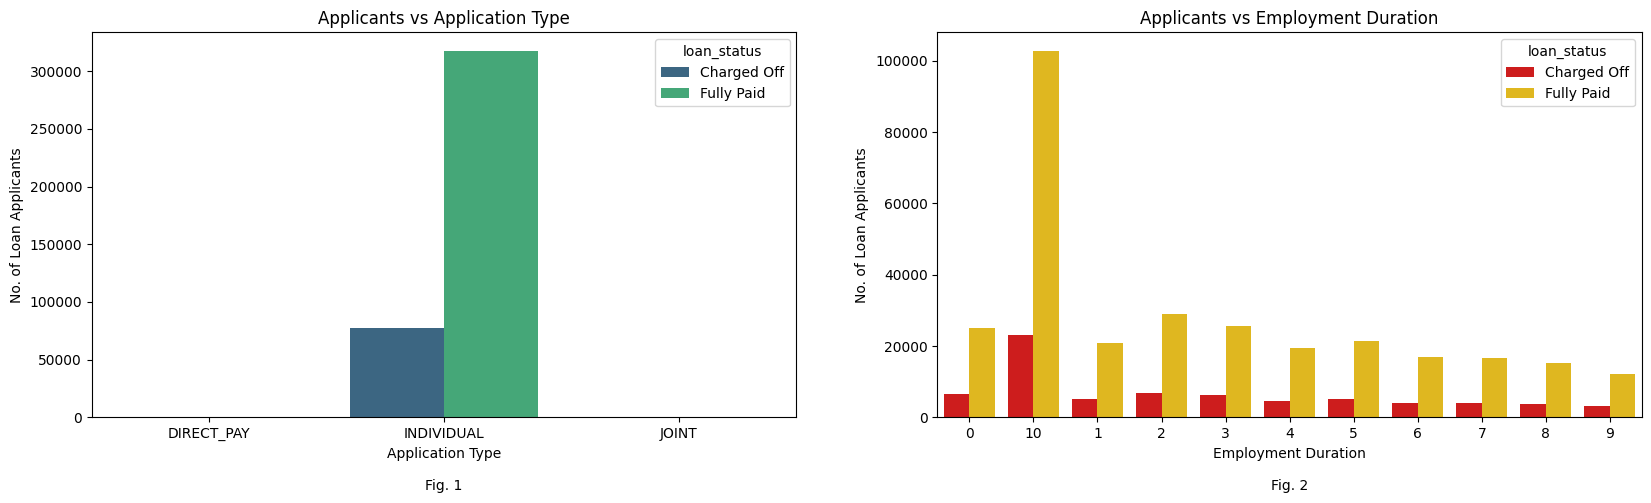

In [365]:
# Check the distribution of data for the categorical columns -> 'application_type', 'emp_length'
plt.figure(figsize=(20,5))

x_col = ['application_type', 'emp_length']
x_lab = ['Application Type', 'Employment Duration']
pal = ['viridis', 'hot', 'flare']

# Create subplots for the columns in consideration
for i in range(len(x_col)):
  plt.subplot(1, len(x_col), i+1)

  # Plot countplot using Seaborn
  sns.countplot(data=df, x=x_col[i], palette=pal[i], hue='loan_status')

  # Add labels and title
  plt.xlabel(f"{x_lab[i]}\n\nFig. {i+1}")
  plt.ylabel('No. of Loan Applicants')
  plt.title(f'Applicants vs {x_lab[i]}')
  if i==2:
    plt.xticks(rotation = 75)

#### Insights
- Fig.1 - From Fig.1, it can be observed that the majority of loan applicants that approach 'LoanTap' are for 'Individual' application type and almost negligible for 'Direct Pay' and 'Joint' application type .
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for 'Individual' application type.
- Fig.2 - From Fig.2, it can be observed that the majority of loan applicants have '10+' years of employment duration i.e. applicants with 10+ years are more likely to take loans.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all the range of employment duration.

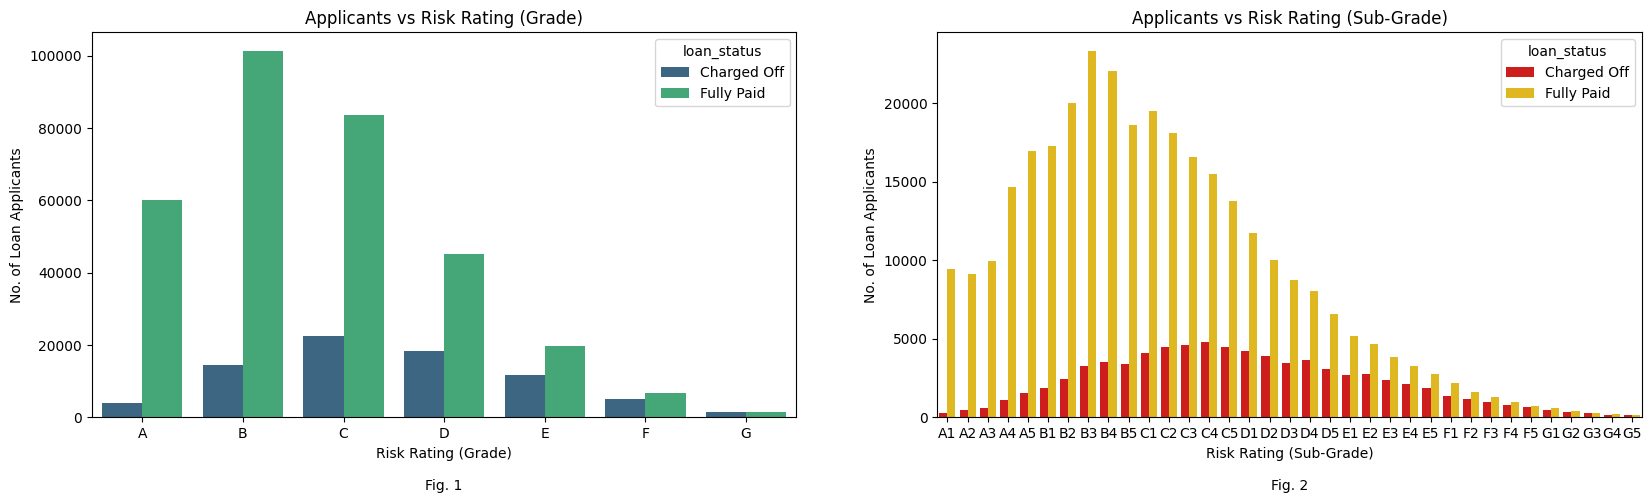

In [366]:
# Check the distribution of data for the categorical columns -> 'grade', 'sub_grade'
plt.figure(figsize=(20,5))

x_col = ['grade', 'sub_grade']
x_lab = [ 'Risk Rating (Grade)', 'Risk Rating (Sub-Grade)']
pal = ['viridis', 'hot', 'flare']

# Create subplots for the columns in consideration
for i in range(len(x_col)):
  plt.subplot(1, len(x_col), i+1)

  # Plot countplot using Seaborn
  sns.countplot(data=df, x=x_col[i], palette=pal[i], hue='loan_status')

  # Add labels and title
  plt.xlabel(f"{x_lab[i]}\n\nFig. {i+1}")
  plt.ylabel('No. of Loan Applicants')
  plt.title(f'Applicants vs {x_lab[i]}')
  if i==2:
    plt.xticks(rotation = 75)

#### Insights
- Fig.1 - From Fig.1, it can be observed that the majority of loan applicants have been given the grade (Risk Rating) of 'B' followed by grades 'C', 'A' and 'D' respectively.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is highest for applicants with grade( Risk Rating) as 'A' followed by grades 'B' and 'C' respectively.
- Fig.2 - From Fig.2, it can be observed that the sub-grade (Risk Rating) closely follows the pattern observed for grade (Risk Rating) mentioned above. Among the sub-grades for 'B' risk rating, the applicants with risk rating 'B3' and 'B4' are the highest.

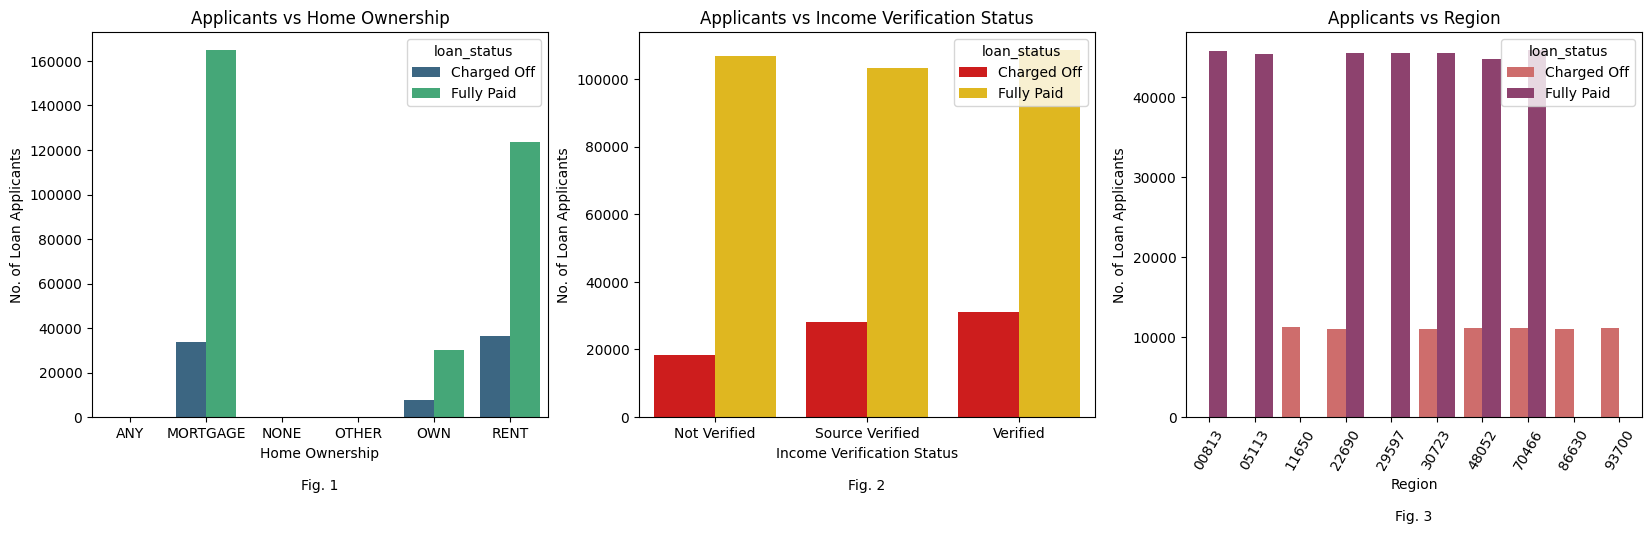

In [367]:
# Check the distribution of data for the categorical columns -> 'home_ownership', 'verification_status', 'Region'
plt.figure(figsize=(20,5))

x_col = ['home_ownership', 'verification_status', 'pin_code']
x_lab = ['Home Ownership', 'Income Verification Status', 'Region']
pal = ['viridis', 'hot', 'flare']

# Create subplots for the columns in consideration
for i in range(len(x_col)):
  plt.subplot(1, len(x_col), i+1)

  # Plot countplot using Seaborn
  sns.countplot(data=df, x=x_col[i], palette=pal[i], hue='loan_status')

  # Add labels and title
  plt.xlabel(f"{x_lab[i]}\n\nFig. {i+1}")
  plt.ylabel('No. of Loan Applicants')
  plt.title(f'Applicants vs {x_lab[i]}')
  if i==2:
    plt.xticks(rotation = 60)


#### Insights¶
- Fig.1 - From Fig.1, it can be observed that the loan applicants are higher for 'Mortgage' and 'Rent' home ownership whereas for 'Own' type of home ownership the loan applicants are considerably low.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all types of home ownership.
- Fig.2 - From Fig.2, it can be observed that there are almost equal number of applicants for all types of 'Income Verification Status'.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is slightly high for 'Not Verified' income verification status and almost equal for 'Source Verified' and 'Verified' income verification status. Overall the 'Loan Repayment' to 'Charged Off' ratio is high for all 'Income Verification Status'.
- Fig.3 - From Fig.3, it can be observed that there are almost equal number of applicants for all the regions except the following -> '11650' '86630' and '93700'.
It can also be observed that the applicant for regions with pincodes('11650'm '86630' and '93700') have not made any loan repayment.

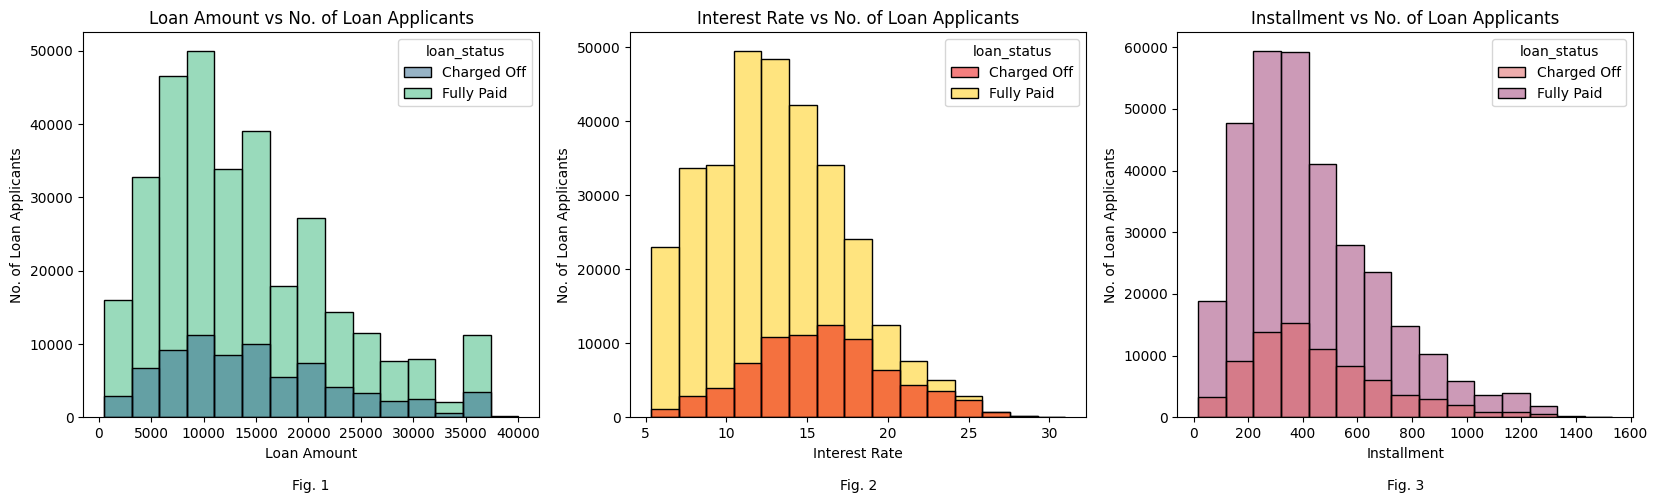

In [368]:
# Check the distribution of data for the numerical columns -> 'loan_amnt', 'int_rate', 'installment'
plt.figure(figsize=(20,5))

x_col = ['loan_amnt', 'int_rate', 'installment']
x_lab = ['Loan Amount', 'Interest Rate', 'Installment']
pal = ['viridis', 'hot', 'flare']

# Create subplots for the columns in consideration
for i in range(len(x_col)):
  plt.subplot(1, len(x_col), i+1)

  # Plot histplot using Seaborn
  sns.histplot(data=df, x=x_col[i], bins=15, hue='loan_status', palette=pal[i])

  # Add labels and title
  plt.xlabel(f"{x_lab[i]}\n\nFig. {i+1}")
  plt.ylabel('No. of Loan Applicants')
  plt.title(f'{x_lab[i]} vs No. of Loan Applicants')

#### Insights
- Fig1 - From Fig.1, it can be observed that the loan applicants are overall higher for 'Loan Amount' less than 20000. It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all types of loan amount taken.
- Fig.2 - From Fig.2, it can be observed that the loan applicants are overall higher for 'Interest Rate' less than 20%.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for interest rate approximately less than 17% whereas the ratio is extremely low for interest rate approximately greater than 17%
- Fig.3 - From Fig.3, it can be observed that the loan applicants are overall higher for installments less than 700.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all types of installments.

## Bivariate Analysis

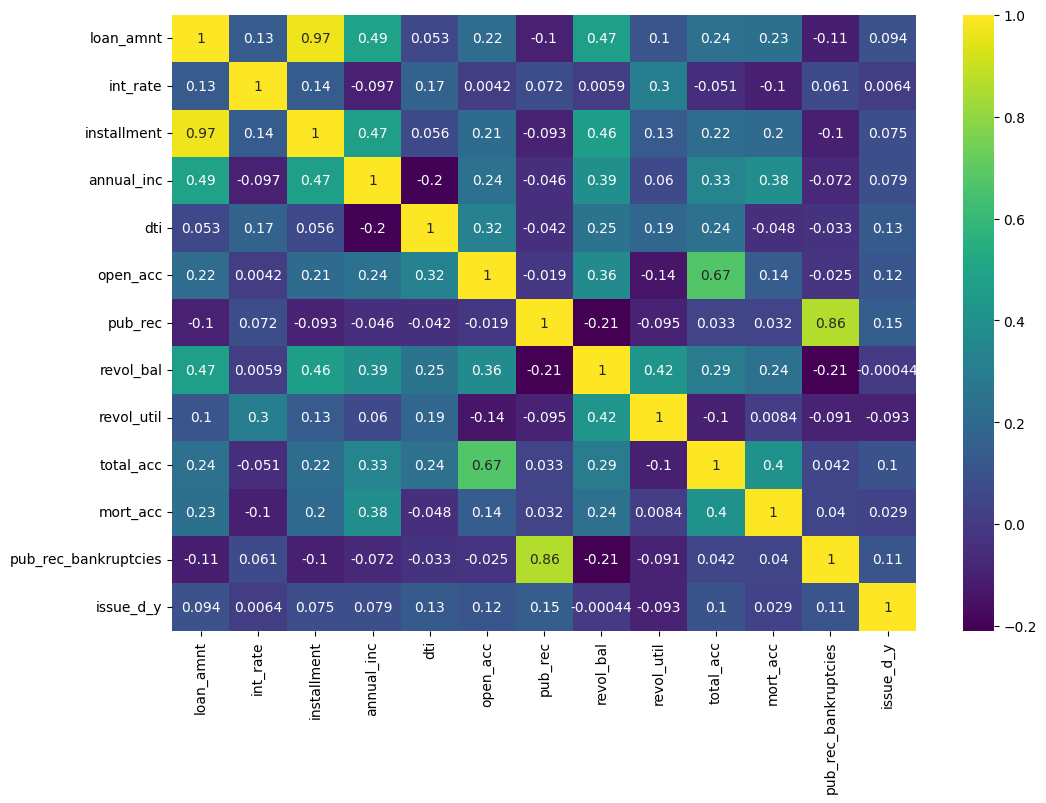

In [369]:
plt.figure(figsize=(12, 8))
df_n = df.select_dtypes(include=[np.number])
sns.heatmap(df_n.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

- We noticed almost perfect correlation between "loan_amnt" the "installment" feature.
- installment: The monthly payment owed by the borrower if the loan originates.
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

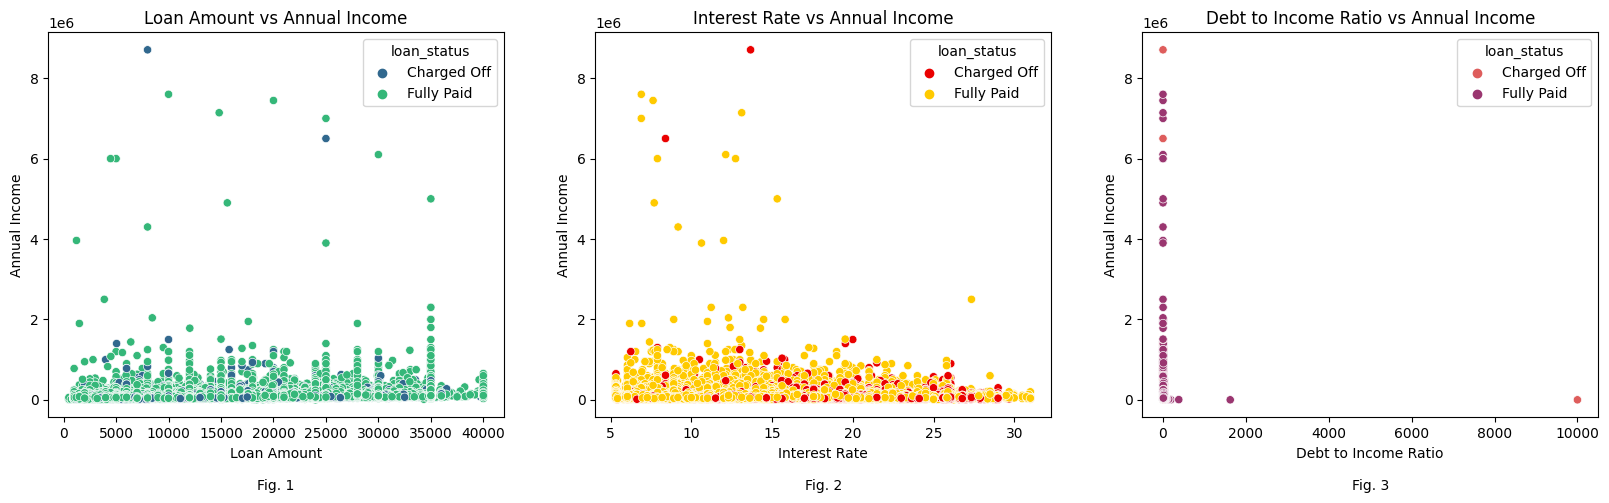

In [370]:
plt.figure(figsize=(20,5))

x_col = ['loan_amnt', 'int_rate', 'dti']
x_lab = ['Loan Amount', 'Interest Rate', 'Debt to Income Ratio']
pal = ['viridis', 'hot', 'flare']

# Create subplots for the columns in consideration
for i in range(len(x_col)):
    plt.subplot(1, len(x_col), i+1)

    # Plot scatterplot using Seaborn
    sns.scatterplot(x = df[x_col[i]], y = df['annual_inc'], hue=df['loan_status'], palette=pal[i])
    
    # Add labels and title
    plt.xlabel(f"{x_lab[i]}\n\nFig. {i+1}")
    plt.ylabel('Annual Income')
    plt.title(f'{x_lab[i]} vs Annual Income')

## Data Processing

### Data Exploration

- The no of people those who have fully paid are 318357 and that of Charged Off are 77673.

In [371]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


- The majority of people have home ownership as Mortgage and Rent.

In [372]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

- Combininging the minority classes as 'OTHER'.

In [373]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
df.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
ANY              0
NONE             0
Name: count, dtype: int64

In [374]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
ANY              0
NONE             0
Name: count, dtype: int64

In [375]:
# Checking the distribution of 'Other' -
df.loc[df['home_ownership']=='OTHER', 'loan_status'].value_counts()

loan_status
Fully Paid     123
Charged Off     23
Name: count, dtype: int64

### Visualization

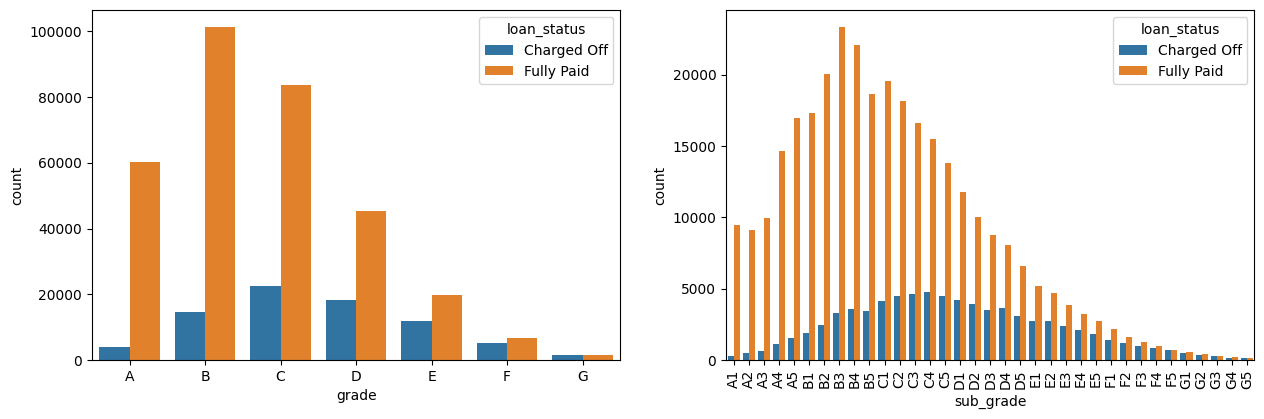

In [376]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [377]:
grade

['A', 'B', 'C', 'D', 'E', 'F', 'G']

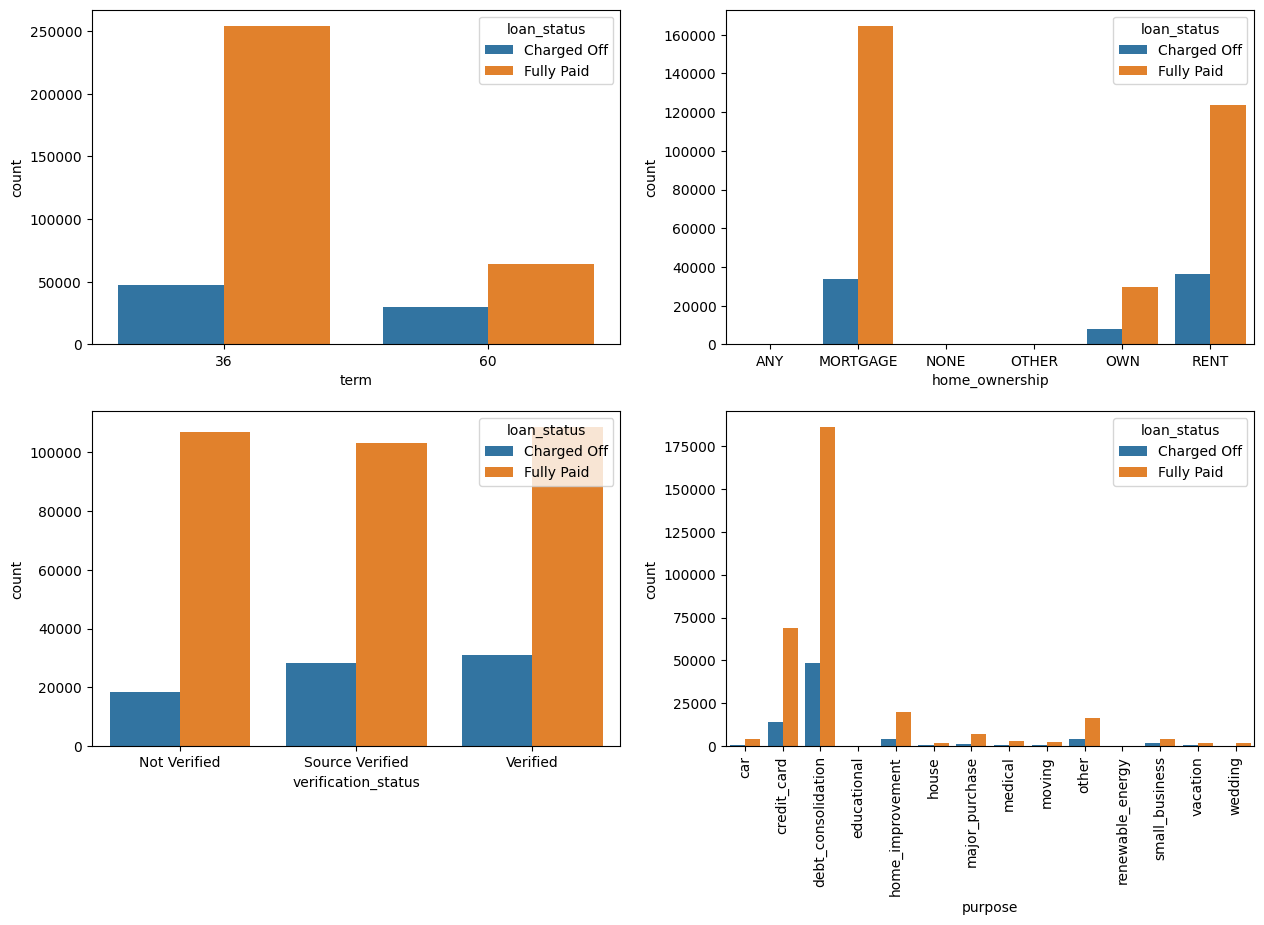

In [378]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

## Feature Engineering

In [379]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [380]:
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

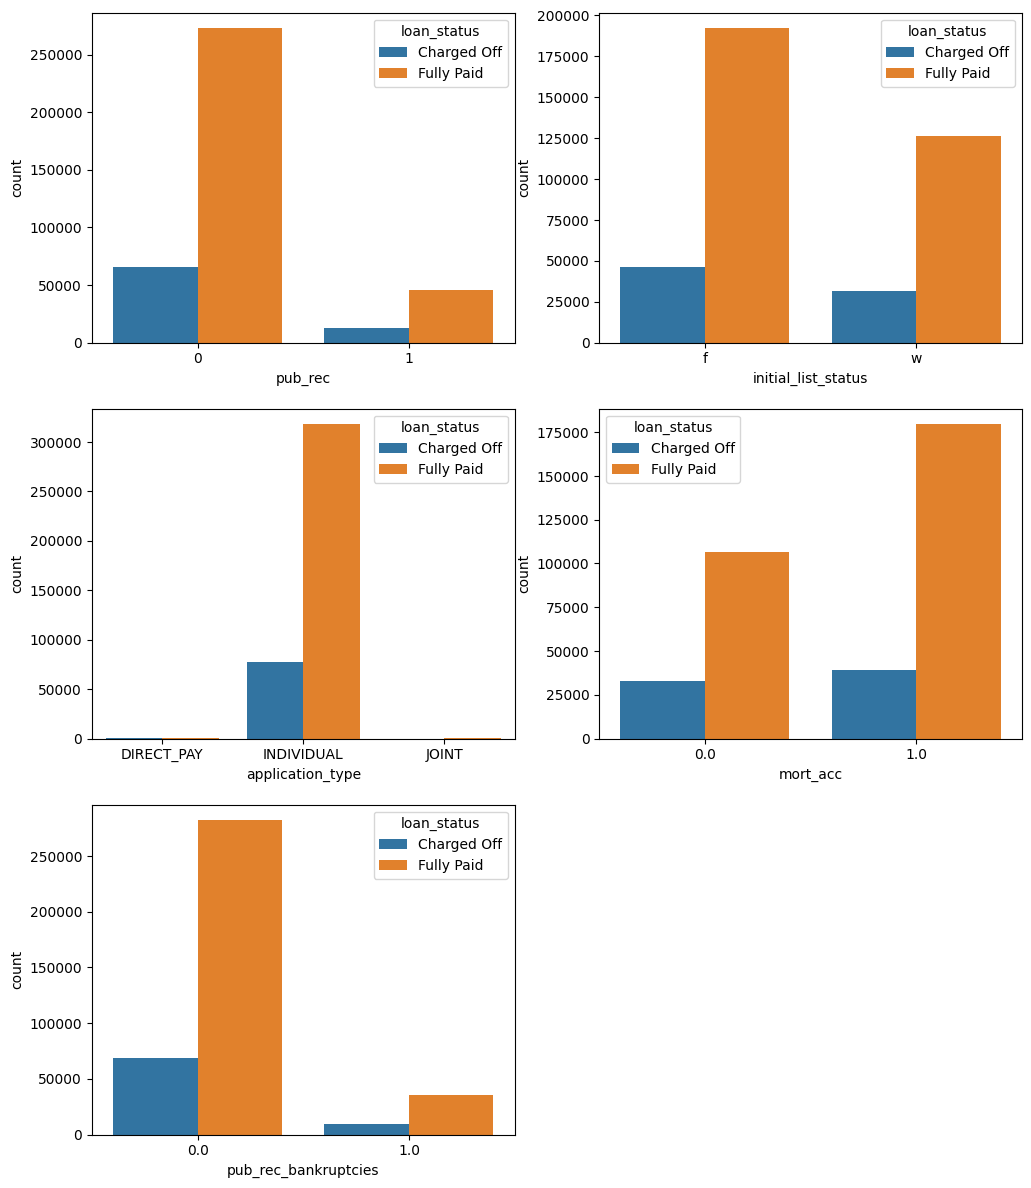

In [381]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=df, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=df, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=df, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=df, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=df, hue='loan_status')

plt.show()

In [382]:
# Mapping of target variable -
df['loan_status'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [383]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
ecl_year                0.000000
pin_code                0.000000
issue_d_y               0.000000
dtype: float64

- There are columns (in both 'Categorical' and 'Numerical' category) that have a large number of missing data.
- The null values will be replaced by 'Mean' in case of 'Numerical' data and 'Mode' in case of 'Categorical' data.

In [384]:
duplicates = df.duplicated()

# Display the rows with duplicates
print("Duplicate Rows:")
df[duplicates]

Duplicate Rows:


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,ecl_year,pin_code,issue_d_y


In [385]:
# Display the total number of null values for each column
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
ecl_year                    0
pin_code                    0
issue_d_y                   0
dtype: int64

- No duplicate values found in the given dataset.

#### Missing value treatment using -> Mean/Mode Method

- Large Number of missing data is present in columns
- 'emp_length' ---> (Categorical)
- 'revol_util', 'mort_acc', 'pub_rec_bankruptcies' ---> (Numerical)

In [386]:
# Null values replaced by 'Mode' in case of 'Categorical' column.
column_mode = df['emp_length'].mode()[0]
df['emp_length'] = df['emp_length'].fillna(column_mode)

In [387]:
# Null values replaced by 'Mean' in case of 'Numerical' column.
for column in ['revol_util', 'mort_acc', 'pub_rec_bankruptcies']:
    column_mean = df[column].mean()
    df[column] = df[column].fillna(column_mean)

In [388]:
# Verify total number of null values for each column is '0'
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
ecl_year                0
pin_code                0
issue_d_y               0
dtype: int64

- No more null values/missing data found in the given dataset.

In [389]:
#Encoding of target variable 'loan_staus' to convert from 'Category' to 'Integer' data type
df['loan_status'] = df['loan_status'].replace('Fully Paid', 1)
df['loan_status'] = df['loan_status'].replace('Charged Off', 0)
df['loan_status']

0         0
1         0
2         0
3         0
4         1
         ..
396025    0
396026    0
396027    0
396028    0
396029    0
Name: loan_status, Length: 396030, dtype: category
Categories (2, int64): [1, 0]

- Loan Status sucessfully mapped as below:
- Fully Paid ----> 1 (Positive Outcome)
- Charged Off ---> 0 (Negative Outcome)

## Outlier Detection & Treatment

In [390]:
numerical_data = df.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

13

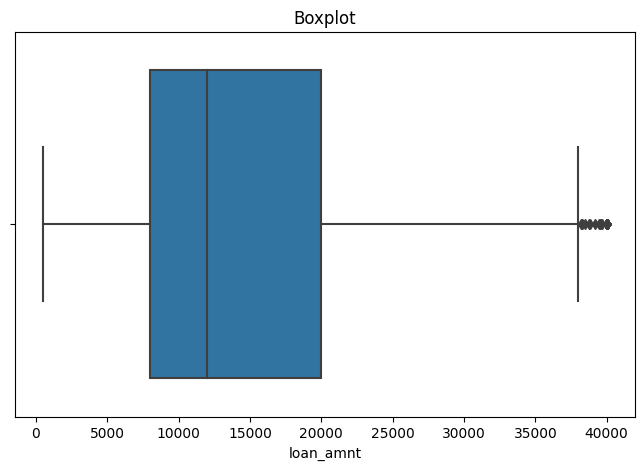

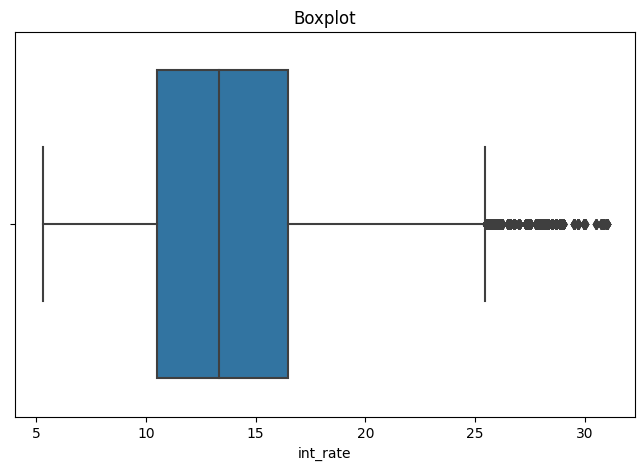

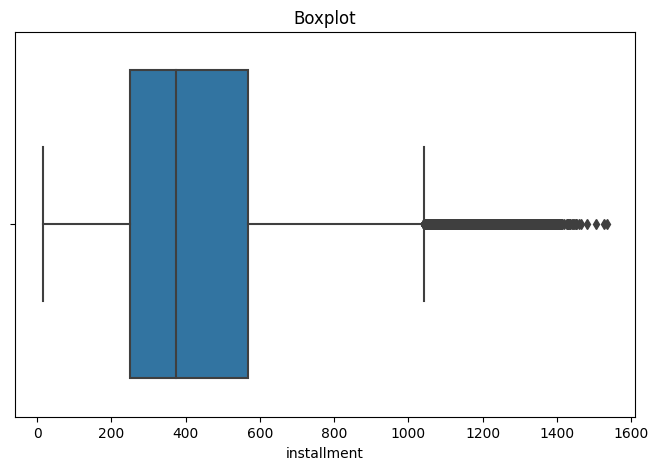

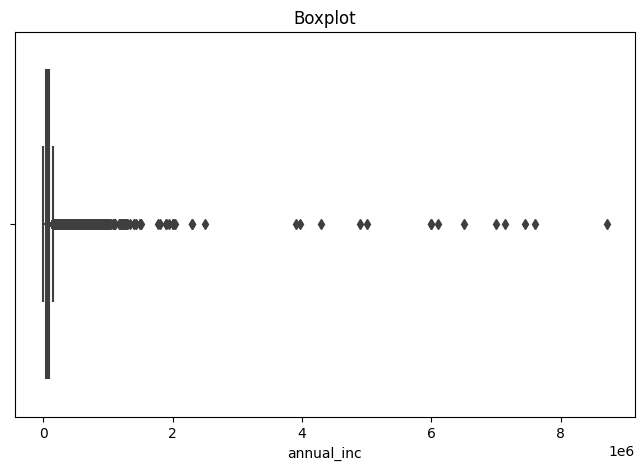

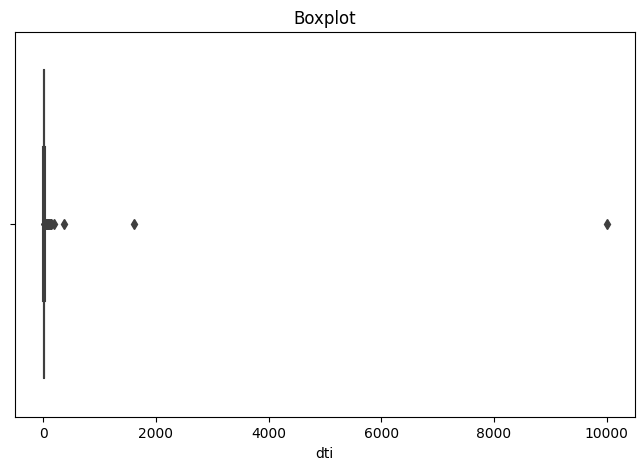

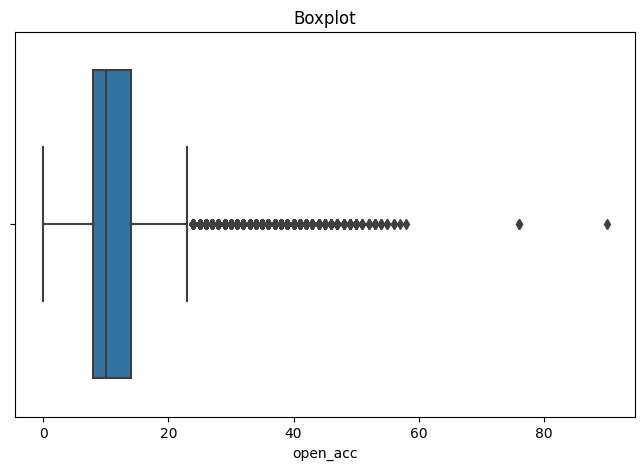

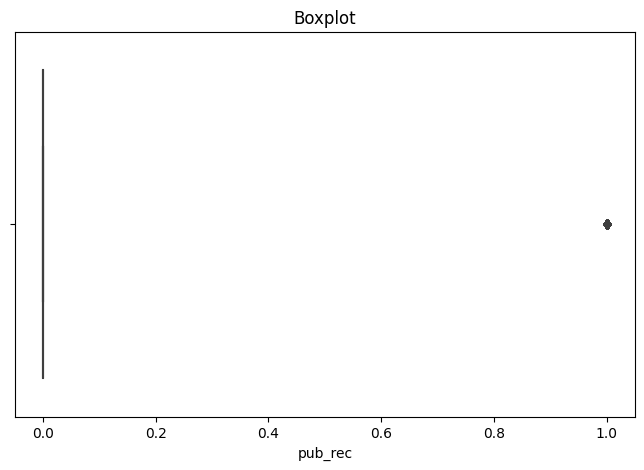

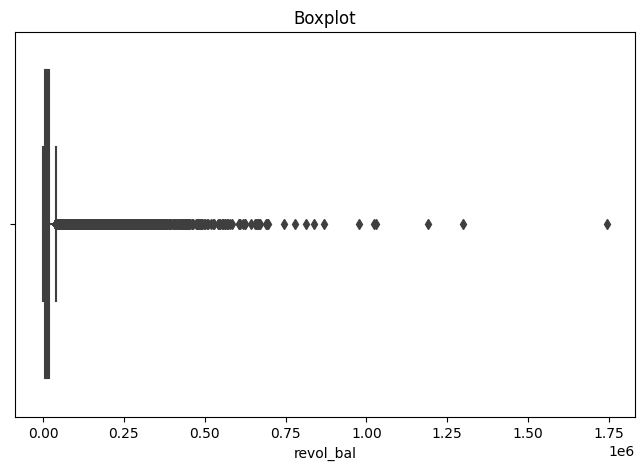

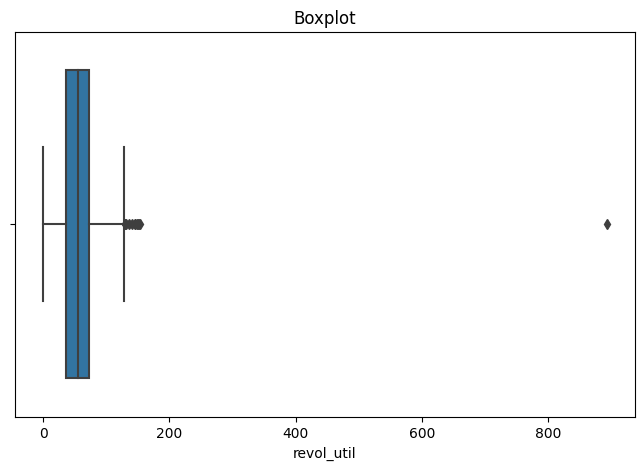

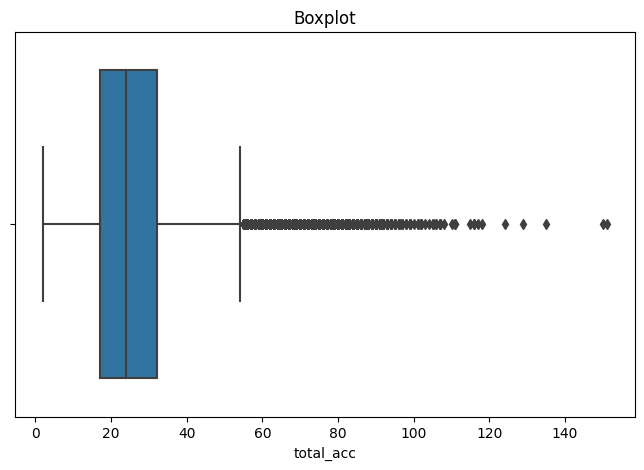

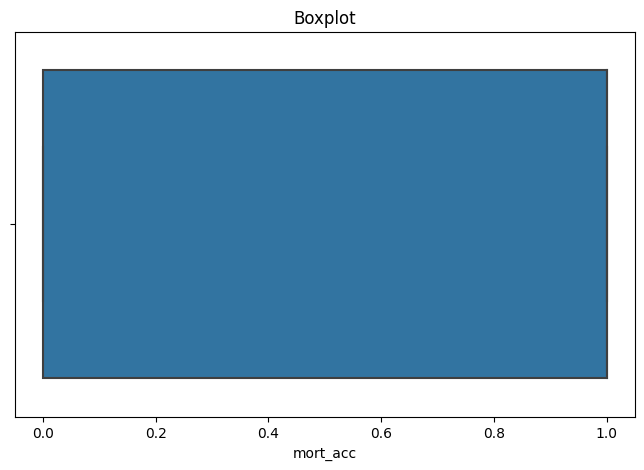

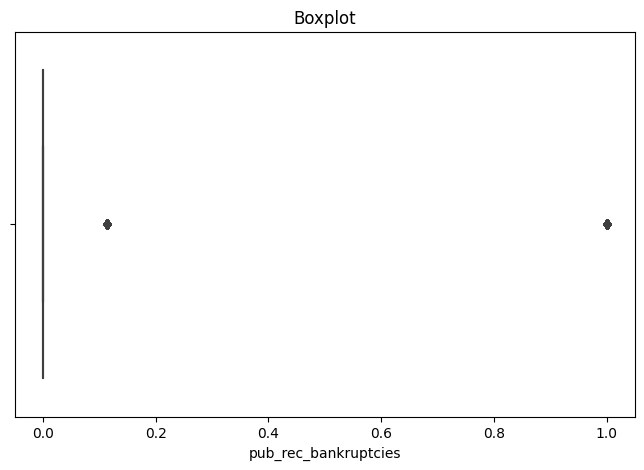

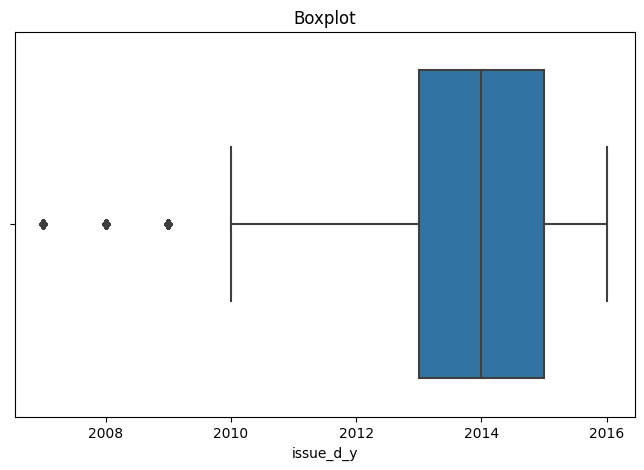

In [391]:
def box_plot(col):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title('Boxplot')
    plt.show()
    
for col in num_cols:
    box_plot(col)

In [392]:
for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()

    upper_limit = mean+3*std
    lower_limit = mean-3*std

    data = df[(df[col]<upper_limit) & (df[col]>lower_limit)]

data.shape

(390769, 25)

#### Data Conversion

In [393]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'ecl_year', 'pin_code',
       'issue_d_y'],
      dtype='object')

In [394]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,ecl_year,pin_code,issue_d_y
0,10000.0,36,11.44,329.48,B,B4,10,RENT,117000.0,Not Verified,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,1990,22690,2015
1,8000.0,36,11.99,265.68,B,B5,4,MORTGAGE,65000.0,Not Verified,...,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,2004,05113,2015
2,15600.0,36,10.49,506.97,B,B3,0,RENT,43057.0,Source Verified,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,2007,05113,2015
3,7200.0,36,6.49,220.65,A,A2,6,RENT,54000.0,Not Verified,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,2006,00813,2014
4,24375.0,60,17.27,609.33,C,C5,9,MORTGAGE,55000.0,Verified,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,1999,11650,2013


In [395]:
# Extraction and Conversion of data from categorical columns
df['months'] = df['term']
df = df.drop(columns= ['term'])

In [396]:
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,ecl_year,pin_code,issue_d_y,months
0,10000.0,11.44,329.48,B,B4,10,RENT,117000.0,Not Verified,0,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,1990,22690,2015,36
1,8000.0,11.99,265.68,B,B5,4,MORTGAGE,65000.0,Not Verified,0,...,53.3,27.0,f,INDIVIDUAL,1.0,0.0,2004,05113,2015,36
2,15600.0,10.49,506.97,B,B3,0,RENT,43057.0,Source Verified,0,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,2007,05113,2015,36
3,7200.0,6.49,220.65,A,A2,6,RENT,54000.0,Not Verified,0,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,2006,00813,2014,36
4,24375.0,17.27,609.33,C,C5,9,MORTGAGE,55000.0,Verified,1,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,1999,11650,2013,60


In [397]:
#Convert variables from 'Category' datatype to 'String' and 'Integer' datatype
for i in ('grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'pin_code'):
  df[i] = df[i].astype(str)
df['ecl_year'] = df['ecl_year'].astype(int)

In [398]:
# Encode the 'Categorical' variable using Label Encoder
from sklearn.preprocessing import LabelEncoder

# Separate features and target variable
X = df.drop(columns= ['loan_status'])
y = df['loan_status']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

for i in ('grade', 'sub_grade','home_ownership', 'purpose','verification_status', 'initial_list_status', 'application_type', 'pin_code'):

  # Fit and transform the categorical column
  X[i] = label_encoder.fit_transform(X[i])

In [399]:
X.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,ecl_year,pin_code,issue_d_y,months
0,10000.0,11.44,329.48,1,8,10,3,117000.0,0,12,...,41.8,25.0,1,1,0.0,0.0,1990,3,2015,36
1,8000.0,11.99,265.68,1,9,4,0,65000.0,0,2,...,53.3,27.0,0,1,1.0,0.0,2004,1,2015,36
2,15600.0,10.49,506.97,1,7,0,3,43057.0,1,1,...,92.2,26.0,0,1,0.0,0.0,2007,1,2015,36
3,7200.0,6.49,220.65,0,1,6,3,54000.0,0,1,...,21.5,13.0,0,1,0.0,0.0,2006,0,2014,36
4,24375.0,17.27,609.33,2,14,9,0,55000.0,2,1,...,69.8,43.0,0,1,1.0,0.0,1999,2,2013,60


In [400]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   int_rate              396030 non-null  float64 
 2   installment           396030 non-null  float64 
 3   grade                 396030 non-null  int32   
 4   sub_grade             396030 non-null  int32   
 5   emp_length            396030 non-null  category
 6   home_ownership        396030 non-null  int32   
 7   annual_inc            396030 non-null  float64 
 8   verification_status   396030 non-null  int32   
 9   purpose               396030 non-null  int32   
 10  dti                   396030 non-null  float64 
 11  open_acc              396030 non-null  float64 
 12  pub_rec               396030 non-null  int64   
 13  revol_bal             396030 non-null  float64 
 14  revol_util            396030 non-nul

Text(0.5, 1.0, 'Loan Amount vs Annual Income')

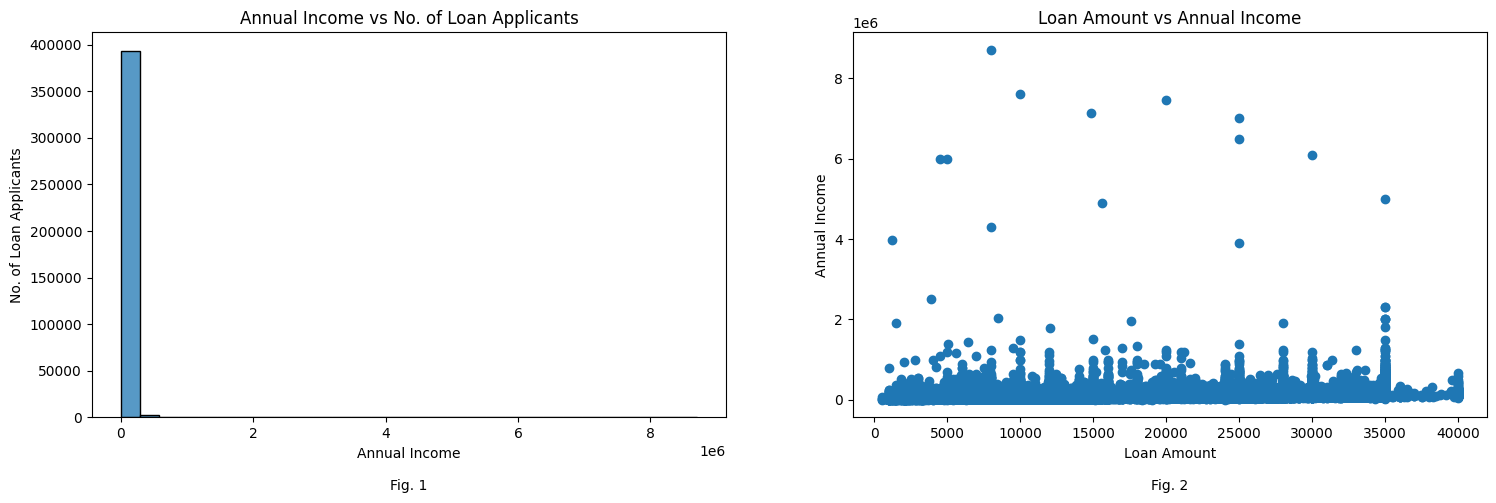

In [401]:
# Scatter plot and Histogram of Annual Income
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='annual_inc', bins=30)
plt.xlabel(f'Annual Income\n\nFig. 1')
plt.ylabel('No. of Loan Applicants')
plt.title('Annual Income vs No. of Loan Applicants')

plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['annual_inc'])
plt.xlabel(f'Loan Amount\n\nFig. 2')
plt.ylabel('Annual Income')
plt.title('Loan Amount vs Annual Income')

- From Fig. 1 it can be observed that most applicants have income approximately less than 300000 per year while there are small number of applicants who have a very high income.
- This is also shown in Fig. 2 which makes the data points densely located at the bottom and there are only few points that are loosely scattered above. These far apart loosely scattered points known as outliers should be removed from the data because it has a risk of baising results of our modelling predictions.

In [402]:
#Convert variables from 'Category' datatype to 'String' and 'Integer' datatype
for i in ('emp_length', 'months', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'pin_code'):
  df[i] = df[i].astype(str)
df['ecl_year'] = df['ecl_year'].astype(int)
df['emp_length'] = df['emp_length'].astype(int)
df['months'] = df['months'].astype(int)

In [403]:
# Encode the 'Categorical' variable using Label Encoder
from sklearn.preprocessing import LabelEncoder

# Separate features and target variable
X = df.drop(columns= ['loan_status'])
y = df['loan_status']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

for i in ('grade', 'sub_grade','home_ownership', 'purpose','verification_status', 'initial_list_status', 'application_type', 'pin_code'):

  # Fit and transform the categorical column
  X[i] = label_encoder.fit_transform(X[i])

- Categorical columns need to be converted to Numerical columns for the model to be trained since Logistic Regression works on numerical values of the variables.

In [404]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  int32  
 4   sub_grade             396030 non-null  int32  
 5   emp_length            396030 non-null  int32  
 6   home_ownership        396030 non-null  int32  
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  int32  
 9   purpose               396030 non-null  int32  
 10  dti                   396030 non-null  float64
 11  open_acc              396030 non-null  float64
 12  pub_rec               396030 non-null  int64  
 13  revol_bal             396030 non-null  float64
 14  revol_util            396030 non-null  float64
 15  

### Data preparation for modeling


In [405]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 43)

In [406]:
print(f'Traning Data:\n{y_train.value_counts()}\n\nValidation Data:\n{y_val.value_counts()}\n\nTesting Data:\n{y_test.value_counts()}')

Traning Data:
loan_status
0    222918
1     54303
Name: count, dtype: int64

Validation Data:
loan_status
0    47621
1    11783
Name: count, dtype: int64

Testing Data:
loan_status
0    47818
1    11587
Name: count, dtype: int64


- It can be observed from the above value counts that the data is imbalanced for outcomes '1' and '0'.
- SMOTE technique is one of the techniques that can be used to balance the data by oversampling the records. SMOTE uses the nearest neighbour concept to oversample data.
- The oversampling will be done for training data only since the model should be making predictions on the real world data, the imbalance in validation and testing data will remain as is.

In [407]:
# Balance data using SMOTE technique
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [408]:
# Verify training data is balanced
print(f'Traning Data:\n{y_train_smote.value_counts()}')

Traning Data:
loan_status
1    222918
0    222918
Name: count, dtype: int64


In [409]:
# Check the collinearity among variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_smote.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_smote.values, i) for i in range(X_train_smote.shape[1])]

# Display the VIF values
print(vif_data)

                Variable            VIF
0              loan_amnt     251.679208
1               int_rate     271.188684
2            installment     223.236420
3                  grade      44.734497
4              sub_grade     163.038093
5             emp_length       4.360457
6         home_ownership       3.423705
7             annual_inc       3.452878
8    verification_status       2.983135
9                purpose       2.617066
10                   dti       2.262889
11              open_acc      13.248590
12               pub_rec       2.621917
13             revol_bal       2.192958
14            revol_util       8.564529
15             total_acc      13.463448
16   initial_list_status       1.566532
17      application_type     472.921821
18              mort_acc       4.949791
19  pub_rec_bankruptcies       2.694579
20              ecl_year  107556.554090
21              pin_code       4.794868
22             issue_d_y  108687.616577
23                months     129.707316


- For the VIF values observed above, it can be inferred that there are multiple columns for which collinearity exists (i.e. High VIF). Collinearity needs to be removed to ensure the stability and interpretability of the model.

In [410]:
X_trainu = X_train_smote.drop(columns= ['installment' , 'sub_grade', 'total_acc', 'application_type', 'issue_d_y', 'int_rate', 'ecl_year', 'months'])

Removing columns with high VIF (i.e. VIF>10) to eliminate collinearity between variables.

In [411]:
# Re-Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X_trainu.columns
vif_data["VIF"] = [variance_inflation_factor(X_trainu.values, i) for i in range(X_trainu.shape[1])]

# Display the VIF values
print(vif_data)

                Variable       VIF
0              loan_amnt  5.941266
1                  grade  4.143745
2             emp_length  3.874768
3         home_ownership  2.651661
4             annual_inc  3.370700
5    verification_status  2.957800
6                purpose  2.328529
7                    dti  2.235278
8               open_acc  6.103298
9                pub_rec  2.587716
10             revol_bal  2.102506
11            revol_util  6.479994
12   initial_list_status  1.478252
13              mort_acc  4.079932
14  pub_rec_bankruptcies  2.647940
15              pin_code  4.269423


- After removing the collinear columns the VIF for remaining columns is within the limit which indicates tolerable collinearity among the remaining variables.

In [412]:
# Remove the collinear columns from validation and testing data
X_valu = X_val.drop(columns= ['installment' , 'sub_grade', 'total_acc', 'application_type', 'issue_d_y', 'int_rate', 'ecl_year', 'months'])
X_testu = X_test.drop(columns= ['installment' , 'sub_grade', 'total_acc', 'application_type', 'issue_d_y', 'int_rate', 'ecl_year', 'months'])

- Standardizing the dat improves the performance and interpretability of the model, and ensures that the algorithm is not influenced by the scale of the input variables.

In [413]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the dataset
X_trainu = scaler.fit_transform(X_trainu)
X_valu = scaler.fit_transform(X_valu)
X_testu = scaler.fit_transform(X_testu)

## Model Building

In [414]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
model = LogisticRegression(penalty='l2', solver='liblinear')

# Train the model on the training set
model.fit(X_trainu, y_train_smote)

LogisticRegression(solver='liblinear')

### Precision Recall Curve and conusion matrix

Accuracy: 0.601087468857316

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.56      0.69     47621
           1       0.30      0.76      0.43     11783

    accuracy                           0.60     59404
   macro avg       0.60      0.66      0.56     59404
weighted avg       0.78      0.60      0.64     59404


Confusion Matrix:


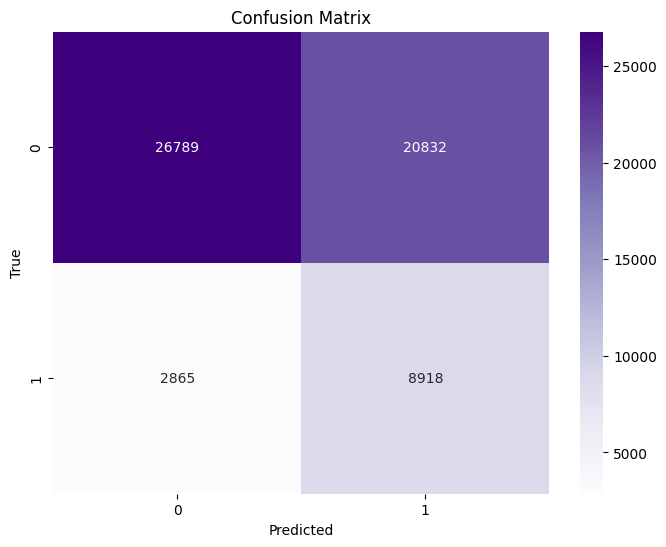

In [415]:
# Predictions on the validation set
yval_pred = model.predict(X_valu)

# Evaluate the model
accuracy = accuracy_score(y_val, yval_pred)
conf_matrix = confusion_matrix(y_val, yval_pred)
classification_rep = classification_report(y_val, yval_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)

print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Insights
- Accuracy: 0.601 (~60%): The overall accuracy of the model is approximately 60%, indicating the proportion of correctly classified instances among the total instances.

- Precision: Precision is the ratio of true positive predictions to the total predicted positives.
Precision for class 0 (precision_0): 0.30 (30%)
Precision for class 1 (precision_1): 0.90 (90%)
Precision is high for class 1, indicating that when the model predicts class 1, it is correct about 90% of the time. However, precision is lower for class 0, suggesting that when the model predicts class 0, it is correct about 30% of the time.

- Recall:Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total actual positives.
Recall for class 0 (recall_0): 0.76 (76%)
Recall for class 1 (recall_1): 0.56 (56%)
The model has a higher recall for class 0, indicating that it effectively identifies about 76% of the actual instances of class 0. However, the recall is lower for class 1, suggesting that it identifies about 56% of the actual instances of class 1.

- F1-Score: F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
F1-score for class 0 (f1-score_0): 0.43
F1-score for class 1 (f1-score_1): 0.69
The F1-scores reflect a trade-off between precision and recall. Class 1 has a higher F1-score, indicating a better balance between precision and recall for class 1 compared to class 0.

- Support: Support represents the number of actual occurrences of each class in the specified dataset.
Support for class 0: 11783 instances
Support for class 1: 47621 instances

## ROC AUC Curve 

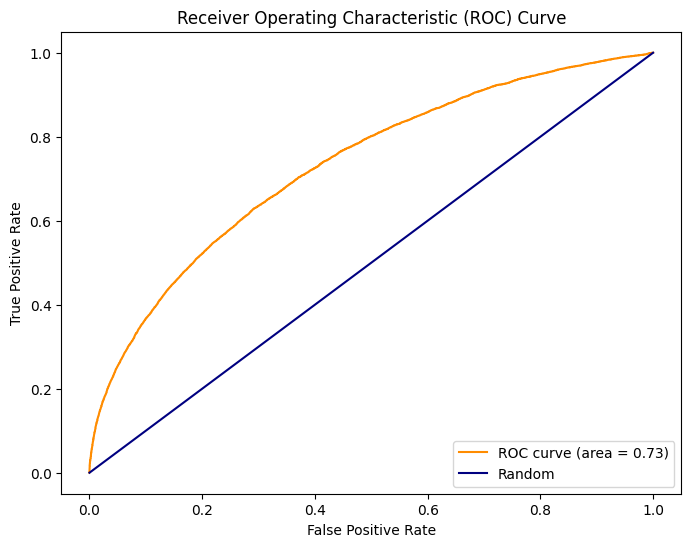

In [416]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_valu)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Insights- 
An AU-ROC value of 0.35 suggests that, on average, the model has a good ability to distinguish between the positive and negative classes, but there is room for improvement.

Accuracy: 0.6011278511909772

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.56      0.69     47818
           1       0.30      0.76      0.43     11587

    accuracy                           0.60     59405
   macro avg       0.60      0.66      0.56     59405
weighted avg       0.79      0.60      0.64     59405


Confusion Matrix:


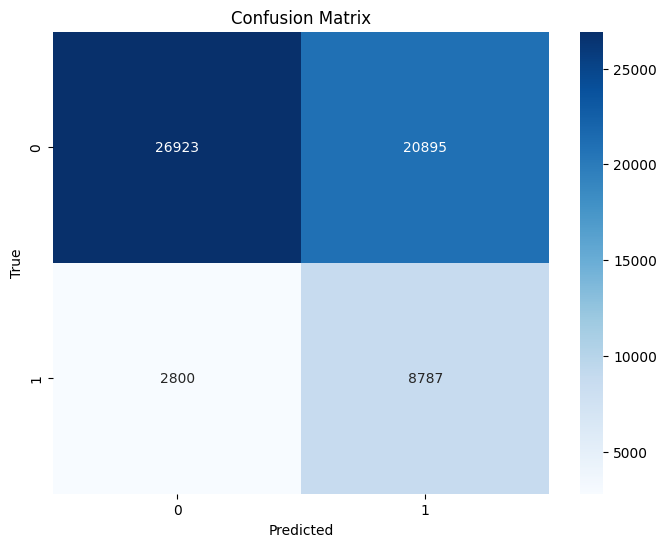

In [417]:
y_pred = model.predict(X_testu)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)

print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Insights
- Accuracy: 0.6011 (~60%):

The overall accuracy of the model is approximately 61%, indicating the proportion of correctly classified instances among the total instances.
Precision:

- Precision is the ratio of true positive predictions to the total predicted positives.
Precision for class 0 (precision_0): 0.30 (30%)
Precision for class 1 (precision_1): 0.91 (91%)
Precision is high for class 1, indicating that when the model predicts class 1, it is correct about 91% of the time. However, precision is lower for class 0, suggesting that when the model predicts class 0, it is correct about 30% of the time.
Recall:

- Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total actual positives.
Recall for class 0 (recall_0): 0.76 (76%)
Recall for class 1 (recall_1): 0.56 (56%)
The model has a higher recall for class 0, indicating that it effectively identifies about 77% of the actual instances of class 0. However, the recall is lower for class 1, suggesting that it identifies about 57% of the actual instances of class 1.

- F1-Score:F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
F1-score for class 0 (f1-score_0): 0.43
F1-score for class 1 (f1-score_1): 0.69
The F1-scores reflect a trade-off between precision and recall. Class 1 has a higher F1-score, indicating a better balance between precision and recall for class 1 compared to class 0.

- Support: Support represents the number of actual occurrences of each class in the specified dataset.
Support for class 0: 11587 instances
Support for class 1: 478118 instances
Overall Insights:

- The model requires further analysis and tuning, to enhance the performance.

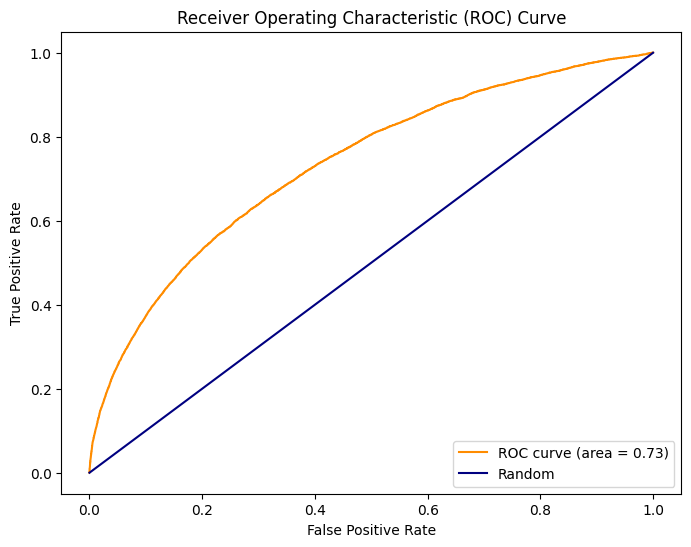

In [418]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_testu)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### Insights- 
An AU-ROC value of 0.75 suggests that, on average, the model has a good ability to distinguish between the positive and negative classes, but there is room for improvement.

In [419]:
# Verify best model by searching best hyperparameters to enhance model's performance 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model = LogisticRegression(penalty='l2', solver='liblinear')

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_trainu, y_train_smote)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_valu)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")


Best Hyperparameters: {'C': 100, 'penalty': 'l1'}
Test Accuracy: 0.601087468857316


#### Insights
- 
From the values mentioned above it can be observed that the model is performing as expected and no further hypertuning can improve the preformance.

#### Tradeoff Questions:
How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

- We should try to keep the precision higher as possible compare to recall , and keep the false positive low.
- That will help not to missout the opportopportunity to finance more individuals and earn interest on it. This we can achieve by setting up the higher threshold.
- Giving loans to those even having slightly higher probability of defaulter, we can maximise the earning , by this risk taking method.

Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

- Since NPA is a real problem in the industry , Company should more investigate and check for the proof of assets.
- Since it was observed in probability plot, verified borrowers had higher probability of defaulters than non-varified.
- Giving loans to those who have no mortgage house of any owned property have higher probability of defaulter , giving loan to this category borrowers can be a problem of NPA.


### Actionable Insights 
- From the values mentioned above it can be observed that the model is performing as expected and no further hypertuning can improve the preformance.
- The low precision value for class 0 can be due to the imbalance of data for the same, if more real time data for class 0 can be provided, the model can be trained better and the performance might increase.
- Also since the data consists of a lot of categorical columns a different ML model might prove better in predicting the outcome than Logistic Regression.
- The model's precision value of 0.90 signifies that it accurately predicts the likelihood of loan repayment in 90% of cases.
- The model's precision value of 0.38 for charged-off loans indicates that, among the instances predicted as charged off, only 38% were correctly classified, emphasizing a lower accuracy in predicting this specific class.
- The model's sensitivity value of 0.71 for loan repayment signifies that it accurately identifies 71% of the instances where loans are repaid, demonstrating its ability to effectively capture a significant portion of the actual loan repayment cases.
- The model's sensitivity value of 0.71 for charged-off loans signifies that it correctly identifies 71% of the actual charged-off instances, reflecting its ability to capture a substantial portion of the relevant cases for this class.

### Recommendations
The features that heavily affected the models outcome are
- grade - LoanTap assigned loan grade (Risk ratings by LoanTap)
- pub_rec - Negative records on borrower's public credit profile.
- From the analysis performed it can also be observed that the applicants for regions with pincodes('11650'm '86630' and '93700') have not made any loan repayment. It can be inferred that either The data is missing w.r.t. loan repayment for these regions or The applicants from regions with pincodes('11650'm '86630' and '93700') are highly unlikely to repay the loan granted by LoanTap.
- LoanTap should carefully review the applicants belonging to above regions.
